In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
from sklearn.decomposition import PCA

pd.set_option("use_inf_as_na", True)

In [2]:
bist30h = [
    "TUPRS.IS",
    "VAKBN.IS",
    "KRDMD.IS",
    "DOHOL.IS",
    "AKBNK.IS",
    "TKFEN.IS",
    "FROTO.IS",
    "GARAN.IS",
    "KOZAA.IS",
    "HALKB.IS",
    "TCELL.IS",
    "KOZAL.IS",
    "VESTL.IS",
    "YKBNK.IS",
    "TTKOM.IS",
    "BIMAS.IS",
    "PETKM.IS",
    "SISE.IS",
    "ARCLK.IS",
    "EREGL.IS",
    "SASA.IS",
    "SAHOL.IS",
    "EKGYO.IS",
    "THYAO.IS",
    "PGSUS.IS",
    "ISCTR.IS",
    "KCHOL.IS",
    "ASELS.IS",
    "TAVHL.IS",
    "GUBRF.IS",
]

In [3]:
df = yf.download(tickers=bist30h, period="max", start="2013-02-01")

df.clip(lower=0, inplace=True)
df.fillna(0, inplace=True)
df = df["Adj Close"]

[*********************100%***********************]  30 of 30 completed


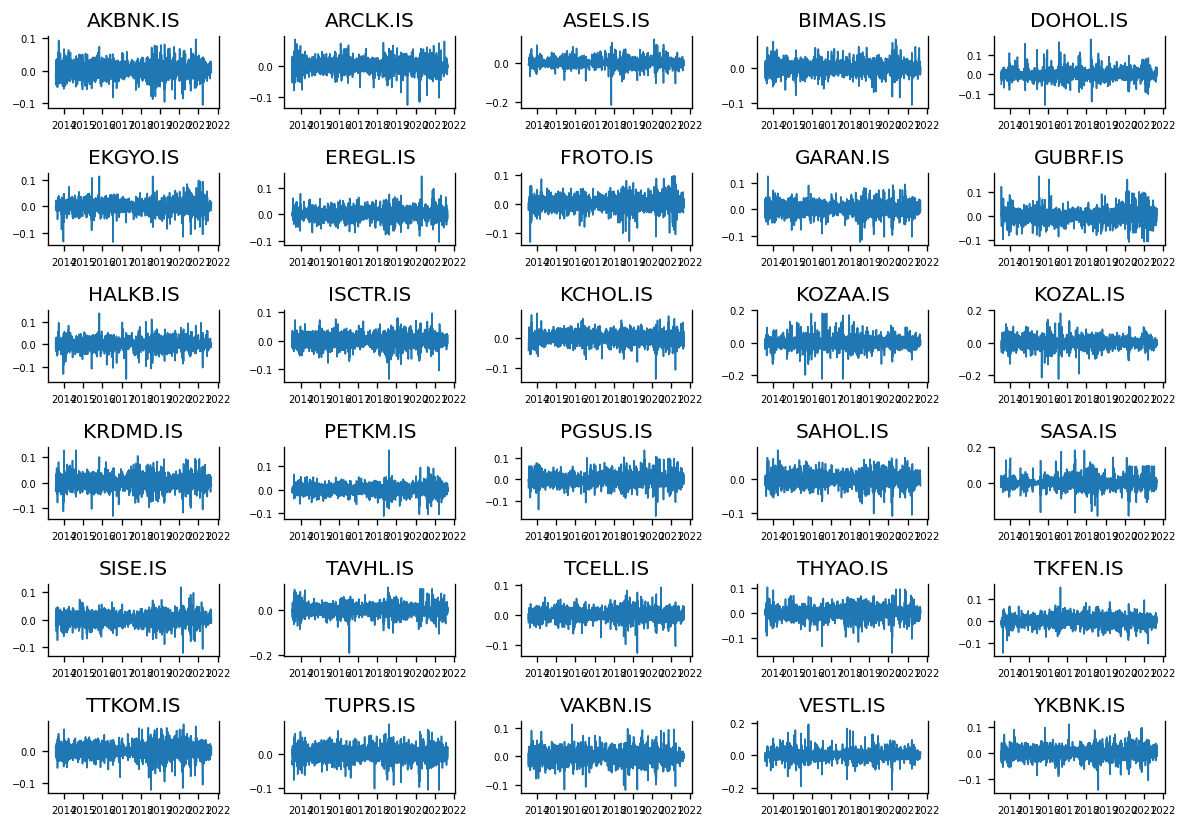

In [4]:
# Returns
df_ret = (np.log(df) - np.log(df.shift(1))).dropna()

fig, axes = plt.subplots(nrows=6, ncols=5, dpi=120, figsize=(10, 7))
for i, ax in enumerate(axes.flatten()):
    data = df_ret[df_ret.columns[i]]
    ax.plot(data, linewidth=1)
    ax.set_title(df_ret.columns[i])
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
plt.tight_layout()

In [5]:
df_ret.describe()

,AKBNK.IS,ARCLK.IS,ASELS.IS,BIMAS.IS,DOHOL.IS,EKGYO.IS,EREGL.IS,FROTO.IS,GARAN.IS,GUBRF.IS,...,SISE.IS,TAVHL.IS,TCELL.IS,THYAO.IS,TKFEN.IS,TTKOM.IS,TUPRS.IS,VAKBN.IS,VESTL.IS,YKBNK.IS
count,2096.000000,2096.000000,2096.000000,2096.000000,2096.000000,2096.000000,2096.000000,2096.000000,2096.000000,2096.000000,...,2096.000000,2096.000000,2096.000000,2096.000000,2096.000000,2096.000000,2096.000000,2096.000000,2096.000000,2096.000000
mean,0.000012,0.000545,0.000944,0.000671,0.000548,-0.000045,0.001513,0.001046,0.000179,0.001346,...,0.000820,0.000495,0.000423,0.000220,0.000508,0.000169,0.000620,-0.000062,0.001260,0.000002
std,0.021365,0.020035,0.021359,0.016450,0.025533,0.021475,0.020693,0.022552,0.022627,0.026571,...,0.020288,0.023642,0.017591,0.023423,0.022272,0.020330,0.019142,0.022852,0.029919,0.020964
min,-0.104985,-0.125868,-0.214952,-0.105360,-0.156843,-0.134454,-0.105089,-0.131401,-0.123981,-0.107030,...,-0.120095,-0.190463,-0.128149,-0.161870,-0.148194,-0.120871,-0.105250,-0.117141,-0.215497,-0.140286
25%,-0.011992,-0.010342,-0.009218,-0.008028,-0.012903,-0.010811,-0.010525,-0.010508,-0.012365,-0.011655,...,-0.010304,-0.012245,-0.008859,-0.011971,-0.011768,-0.010152,-0.009703,-0.011849,-0.012466,-0.011235
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.011411,0.011208,0.010041,0.008985,0.012423,0.011096,0.013307,0.013263,0.012531,0.013146,...,0.012384,0.012996,0.009842,0.012982,0.013775,0.010570,0.010855,0.012612,0.014085,0.011566
max,0.096114,0.088479,0.121545,0.082469,0.178483,0.113455,0.144163,0.095310,0.124012,0.166084,...,0.115769,0.102228,0.092234,0.103436,0.153290,0.082997,0.087237,0.111352,0.189382,0.109589


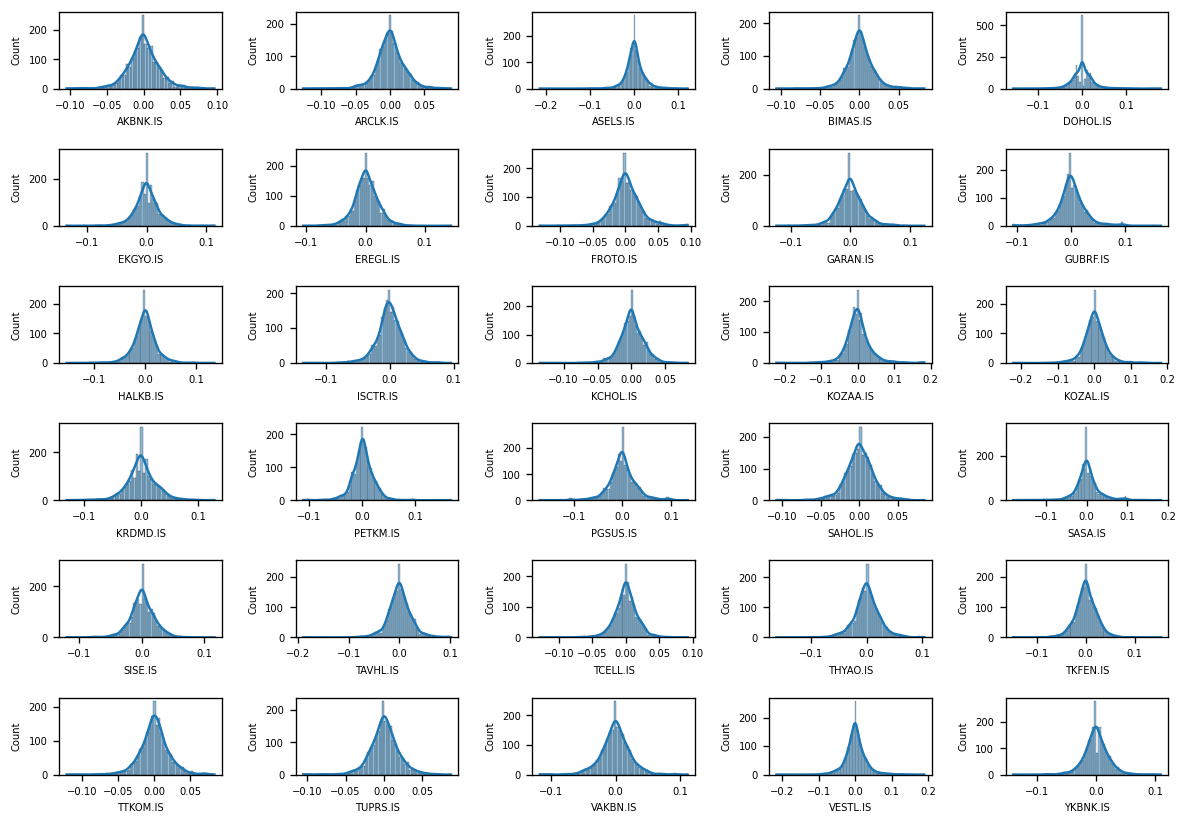

In [6]:
plt.rcParams["axes.labelsize"] = 6
plt.rcParams["xtick.labelsize"] = 6
plt.rcParams["ytick.labelsize"] = 6

fig, axes = plt.subplots(nrows=6, ncols=5, dpi=120, figsize=(10, 7))
for i, ax in enumerate(axes.flatten()):
    data = df_ret[df_ret.columns[i]]
    sns.histplot(data, ax=ax, kde=True)
plt.tight_layout()

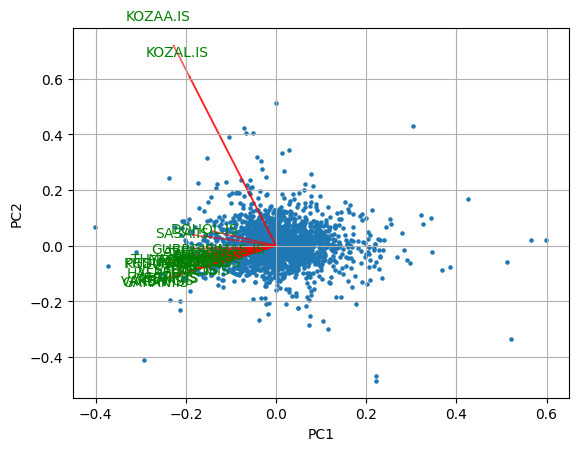

In [7]:
# https://ostwalprasad.github.io/machine-learning/PCA-using-python.html
plt.style.use("default")

pcamodel = PCA(n_components=2)
pca = pcamodel.fit_transform(df_ret)


def myplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color="r", alpha=0.5)
        if labels is None:
            plt.text(
                coeff[i, 0] * 1.15,
                coeff[i, 1] * 1.15,
                "Var" + str(i + 1),
                color="green",
                ha="center",
                va="center",
            )
        else:
            plt.text(
                coeff[i, 0] * 1.15,
                coeff[i, 1] * 1.15,
                labels[i],
                color="g",
                ha="center",
                va="center",
            )

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()


myplot(pca[:, 0:2], np.transpose(pcamodel.components_[0:2, :]), list(df_ret.columns))
plt.show()